In [1]:
import pandas as pd
import datetime as dt
online=pd.read_csv("online.csv")
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 08:26,3.39,17850.0,United Kingdom


# [dataset](https://archive.ics.uci.edu/ml/datasets/online+retail)

# 圖0: 最熱門產品

In [2]:
#可以去查PAPER CRAFT , LITTLE BIRDIE 這項商品(最熱門商品，購買次數最多)的圖片
online=online[online["Quantity"]>0]
a0=pd.DataFrame(online.groupby("Description")["Quantity"].sum().sort_values(ascending=False)[0:20])
a0=a0.reset_index()
a0

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3,JUMBO BAG RED RETROSPOT,48478
4,WHITE HANGING HEART T-LIGHT HOLDER,37895
5,POPCORN HOLDER,36761
6,ASSORTED COLOUR BIRD ORNAMENT,36461
7,PACK OF 72 RETROSPOT CAKE CASES,36419
8,RABBIT NIGHT LIGHT,30788
9,MINI PAINT SET VINTAGE,26633


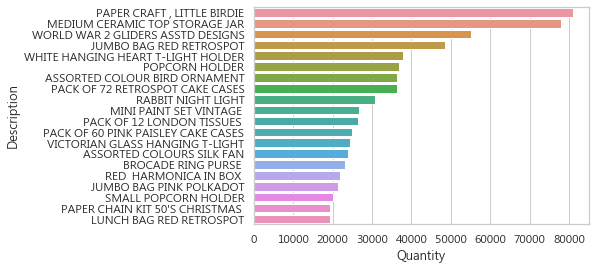

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
sns.barplot(x='Quantity', y='Description', data=a0)

# 資料概述

In [4]:
print("總共有幾位顧客: ",len(pd.unique(online["CustomerID"])))
print("總共有幾筆資料: ",online.shape[0])
print("總共有幾樣產品: ",len(pd.unique(online["StockCode"])))
print("總共有幾筆交易: ", online['InvoiceNo'].nunique())

總共有幾位顧客:  4340
總共有幾筆資料:  531285
總共有幾樣產品:  3941
總共有幾筆交易:  20728


In [5]:
online["product type"]=online["StockCode"].apply(lambda x:x[0])
online["product type"].value_counts()

2    430571
8     61722
4     11306
1      7511
7      6961
3      5522
9      4559
P      1134
D       742
5       628
M       327
C       142
6       106
g        34
B        15
A         2
S         2
m         1
Name: product type, dtype: int64

In [6]:
online["TotalSum"]=online["UnitPrice"]*online["Quantity"]

In [7]:
def get_month(x): return dt.datetime(x.year,x.month,1)
online['InvoiceDay'] = pd.to_datetime(online['InvoiceDate']).apply(get_month)
online=online.dropna()
online["CustomerID"]=online["CustomerID"].astype("category")
online["judge"]=online["product type"].apply(lambda x:x.isnumeric())
online=online[online["judge"]==True]
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product type,TotalSum,InvoiceDay,judge
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 08:26,2.55,17850.0,United Kingdom,8,15.30,2010-12-01,True
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,7,20.34,2010-12-01,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 08:26,2.75,17850.0,United Kingdom,8,22.00,2010-12-01,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,8,20.34,2010-12-01,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,8,20.34,2010-12-01,True


# 圖一:全年各項商品的購買總額

Text(0.5, 1.0, '全年各項商品的購買總額')

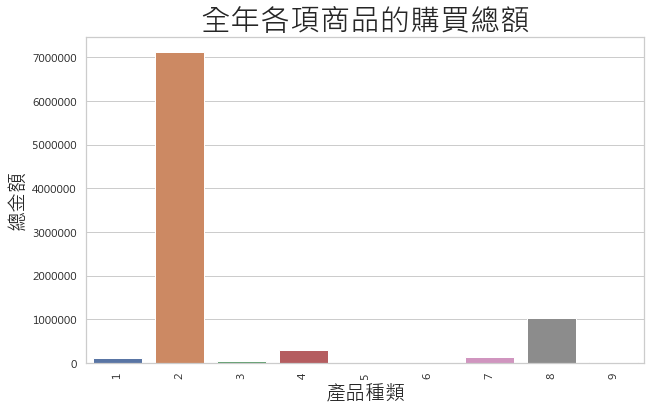

In [8]:
allyear=online.groupby("product type")["TotalSum"].sum()
allyear=pd.DataFrame(allyear)
allyear=allyear.reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="product type", y='TotalSum', data=allyear)
plt.xticks(rotation=90)
plt.ylabel("總金額",fontsize = 20)
plt.xlabel("產品種類",fontsize = 20)
plt.title("全年各項商品的購買總額",fontsize = 30)

In [10]:
def get_day(x): return dt.datetime(x.year,x.month,x.day)
online["day"]=pd.to_datetime(online["InvoiceDate"]).apply(get_day)

In [11]:
online["hour"]=pd.to_datetime(online['InvoiceDate']).apply(lambda x:x.hour)
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product type,TotalSum,InvoiceDay,judge,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 08:26,2.55,17850.0,United Kingdom,8,15.30,2010-12-01,True,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,7,20.34,2010-12-01,True,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 08:26,2.75,17850.0,United Kingdom,8,22.00,2010-12-01,True,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,8,20.34,2010-12-01,True,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,8,20.34,2010-12-01,True,2010-12-01,8


# 圖二:全年每小時的消費紀錄分布(筆)

Text(0, 0.5, '訂單數')

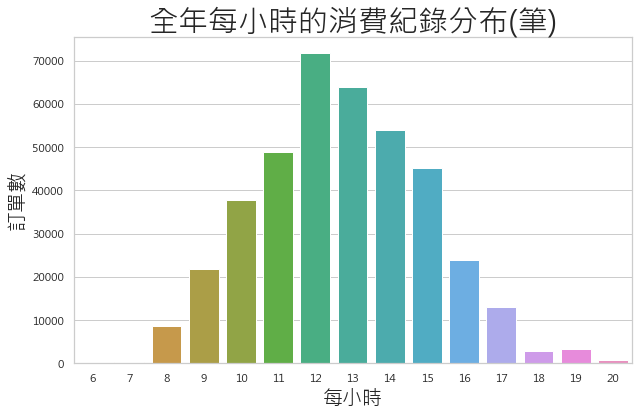

In [12]:
a2=online.groupby("hour")["InvoiceNo"].count()
a2=pd.DataFrame(a2)
a2=a2.reset_index()
plt.figure(figsize=(10,6))

sns.barplot(x="hour", y='InvoiceNo', data=a2)
plt.xticks(rotation=0)
plt.title("全年每小時的消費紀錄分布(筆)",fontsize=30)
plt.xlabel("每小時",fontsize=20)
plt.ylabel("訂單數",fontsize=20)

In [13]:
online["day_name"]=online["day"].apply(lambda x:x.strftime('%A'))
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product type,TotalSum,InvoiceDay,judge,day,hour,day_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 08:26,2.55,17850.0,United Kingdom,8,15.30,2010-12-01,True,2010-12-01,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,7,20.34,2010-12-01,True,2010-12-01,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 08:26,2.75,17850.0,United Kingdom,8,22.00,2010-12-01,True,2010-12-01,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,8,20.34,2010-12-01,True,2010-12-01,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,8,20.34,2010-12-01,True,2010-12-01,8,Wednesday


# 圖三:全年每日的消費紀錄分布(筆)

Text(0, 0.5, '訂單數')

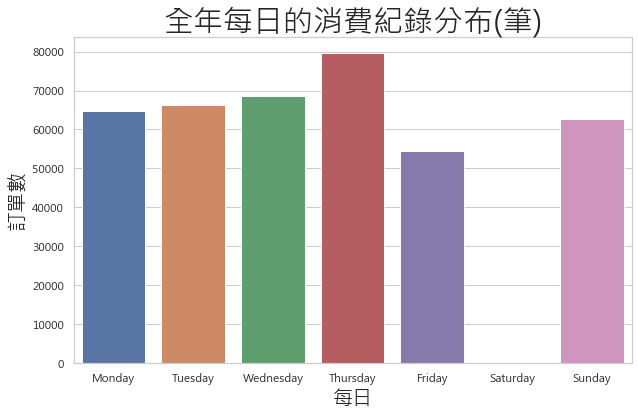

In [14]:
a3=online.groupby("day_name")["InvoiceNo"].count()
a3=pd.DataFrame(a3)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
a3=a3.reindex(index = day_order)
a3=a3.reset_index()
fig = plt.figure(figsize=(10,6))
sns.barplot("day_name", y='InvoiceNo', data=a3)
plt.xticks(rotation=0)
plt.title("全年每日的消費紀錄分布(筆)",fontsize=30)
plt.xlabel("每日",fontsize=20)
plt.ylabel("訂單數",fontsize=20)

In [15]:
pd.value_counts(online["day_name"])

Thursday     79711
Wednesday    68617
Tuesday      66222
Monday       64624
Sunday       62646
Friday       54550
Name: day_name, dtype: int64

In [16]:
a4=pd.DataFrame(pd.value_counts(online["Country"])[:10])
a4=a4.reset_index()
a4

,index,Country
0,United Kingdom,354005
1,Germany,8659
2,France,8034
3,EIRE,7138
4,Spain,2423
5,Netherlands,2326
6,Belgium,1935
7,Switzerland,1811
8,Portugal,1425
9,Australia,1184


# 圖四:資料庫裡面的顧客主要來自哪前10個國家

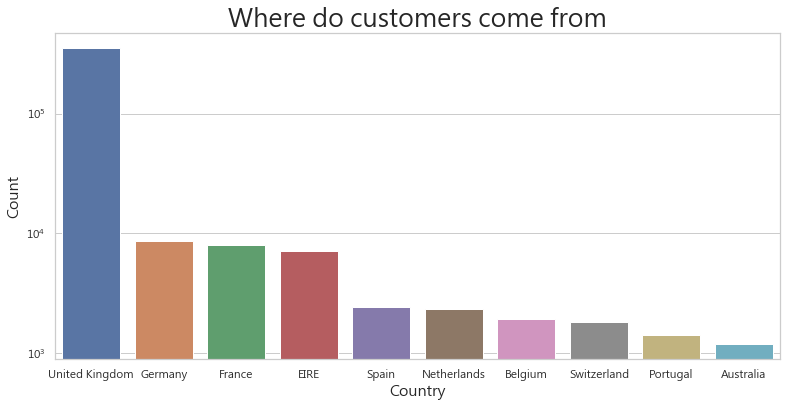

In [17]:
fig = plt.figure(figsize=(13,6))
sns.barplot(x = "index" , y = "Country",data=a4)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Where do customers come from",fontsize=25)
plt.yscale('log')

# 圖五:全年每月的消費時間紀錄分布(筆)


推測11月訂單數較高的原因是因為要購買感恩節禮物以及可能提前採買聖誕節禮物

Text(0, 0.5, '訂單數')

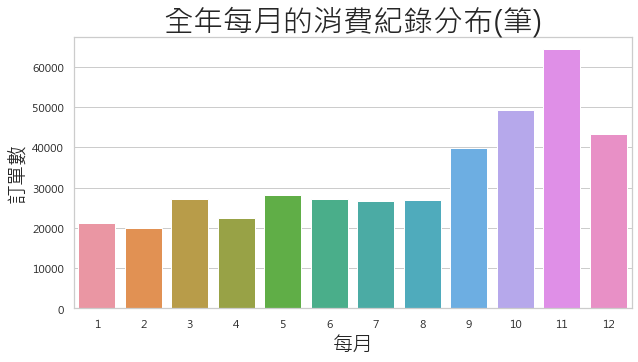

In [18]:
online["month"]=online["day"].apply(lambda x:x.month)
a5=online.groupby("month")["InvoiceNo"].count()
a5=pd.DataFrame(a5)

a5=a5.reset_index()
fig = plt.figure(figsize=(10,5))
sns.barplot("month", y='InvoiceNo', data=a5)
plt.xticks(rotation=0)
plt.title("全年每月的消費紀錄分布(筆)",fontsize=30)
plt.xlabel("每月",fontsize=20)
plt.ylabel("訂單數",fontsize=20)

In [19]:
online["CustomerID"]=online["CustomerID"].astype("int").astype("category")

In [20]:
a6=pd.DataFrame(online.groupby("CustomerID")["TotalSum"].sum())
a6=a6.reset_index()
a6

,CustomerID,TotalSum
0,12346,77183.60
1,12347,4310.00
2,12348,1437.24
3,12349,1457.55
4,12350,294.40
...,...,...
4330,18280,180.60
4331,18281,80.82
4332,18282,178.05
4333,18283,2088.93


# 圖六:資料庫裡面顧客總消費金額分布

In [21]:
#資料呈現右偏分布，且尾巴拉很長，從box plot上我們也看到outlier很多，代表大部分的客人購買金額都很少，但是有少數的客人購買金額非常龐大

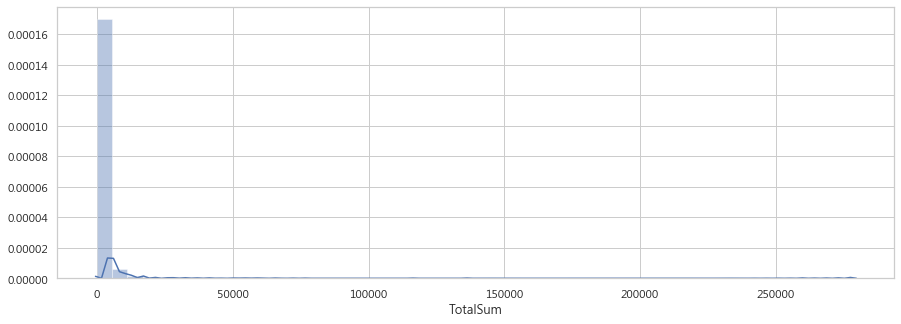

In [22]:
fig = plt.figure(figsize=(15,5))
ax1=sns.distplot(a6['TotalSum'])
plt.show()

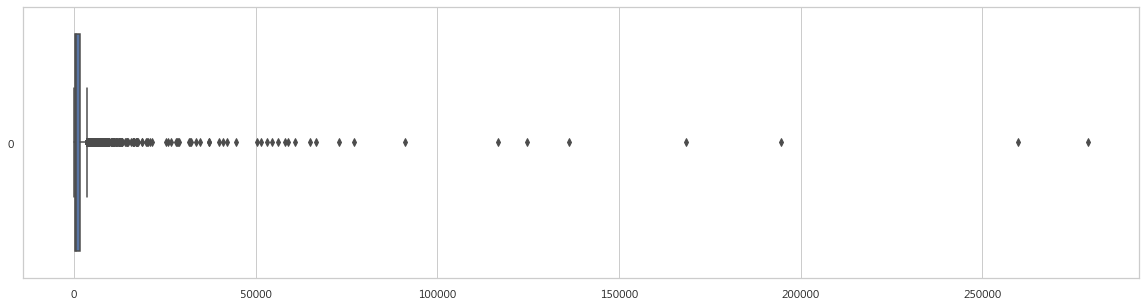

In [23]:
fig = plt.figure(figsize=(20,5))

sns.boxplot(data=a6["TotalSum"], orient='horizontal')
plt.show()

# 圖7:會員對於營收的貢獻

In [24]:
a7=a6
a7=a7.sort_values("TotalSum",ascending=False)
a7['cum_sum'] = a7['TotalSum'].cumsum()
a7['cum_perc'] = 100*a7['cum_sum']/a7['TotalSum'].sum()
a7["rank"]= range(1,a7.shape[0]+1)
a7.head()

,CustomerID,TotalSum,cum_sum,cum_perc,rank
1690,14646,279138.02,279138.02,3.186119,1
4198,18102,259657.30,538795.32,6.149883,2
3726,17450,194550.79,733346.11,8.370512,3
3007,16446,168472.50,901818.61,10.293480,4
1880,14911,136275.72,1038094.33,11.848949,5


Text(1000, 45, '排名前約440多(前10%)的顧客佔總業績約6成')

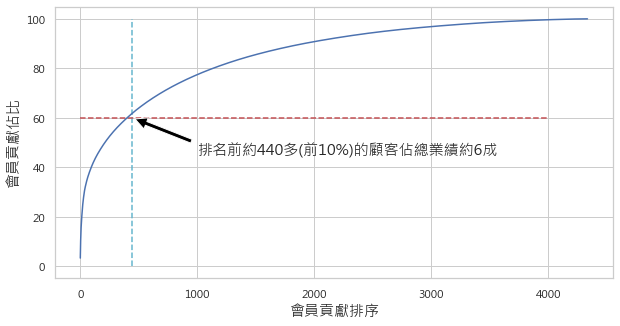

In [25]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x="rank", y ="cum_perc"  ,data=a7)
#從圖中我們可以發現消費總額排名前440多左右的顧客佔整體消費金額的60趴
#由於資料庫裡面有4400位左右的顧客，因此我們可以說金字塔頂端的前10趴顧客對於整體的營收貢獻是很大的
plt.vlines(440, 0, 100, colors = "c", linestyles = "dashed")
plt.hlines(60, 0, 4000, colors = "r", linestyles = "dashed")
plt.xlabel("會員貢獻排序",fontsize=15)
plt.ylabel("會員貢獻佔比",fontsize=15)
plt.annotate('排名前約440多(前10%)的顧客佔總業績約6成', xy=(440, 60), xytext=(1000, 45),
            xycoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05)
            , fontsize=15)

# 圖8:資料庫中的顧客，哪個國家的顧客平均購買金額較高

In [26]:
a8=pd.DataFrame(online.groupby("Country")["TotalSum"].mean())
a8=a8.reset_index()
a8=a8.sort_values("TotalSum",ascending=False)
a8.head()

,Country,TotalSum
23,Netherlands,122.050447
0,Australia,116.698742
19,Japan,116.561900
31,Sweden,86.073201
9,Denmark,49.622180


Text(0.5, 1.0, 'What countries buy more')

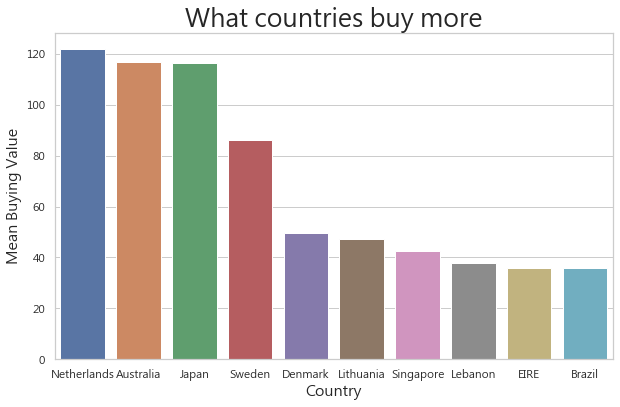

In [27]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = "Country" , y = "TotalSum",data=a8[:10])
plt.xlabel("Country",fontsize=15)
plt.ylabel("Mean Buying Value",fontsize=15)
plt.title("What countries buy more",fontsize=25)

In [28]:
a9=pd.DataFrame(online.groupby("day")["TotalSum"].sum())
a9=a9.reset_index()
a9

,day,TotalSum
0,2010-12-01,46219.29
1,2010-12-02,47283.53
2,2010-12-03,23576.01
3,2010-12-05,31315.64
4,2010-12-06,31014.21
...,...,...
300,2011-12-05,55920.60
301,2011-12-06,45584.19
302,2011-12-07,68699.21
303,2011-12-08,50214.15


# 圖九:全年營業額變化

C:\Users\POPO\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '全年營業額變化')

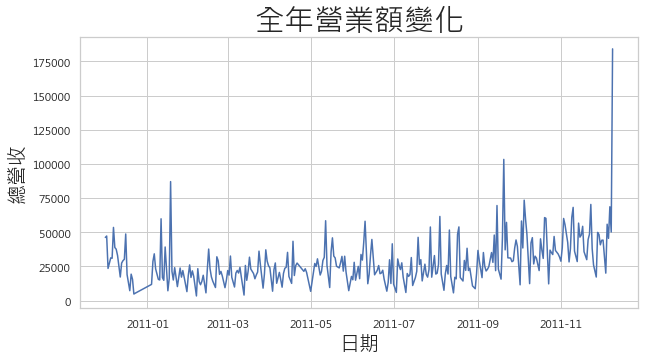

In [29]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x="day", y='TotalSum', data=a9)
plt.xlabel("日期",fontsize=20)
plt.ylabel("總營收",fontsize=20)
plt.title("全年營業額變化",fontsize=30)